In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 




In [4]:
df = pd.read_csv("bank-full.csv",sep=';')
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


Text(0.5, 1.0, 'Age distribution')

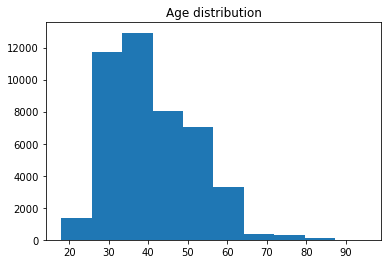

In [5]:
plt.hist(df['age'],bins=10)
plt.title('Age distribution')

In [40]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
#we can see that the age of the customers varies between 18-95
#Customers of age between 33-48 are contacted more.


Text(0.5, 1.0, 'duration distribution')

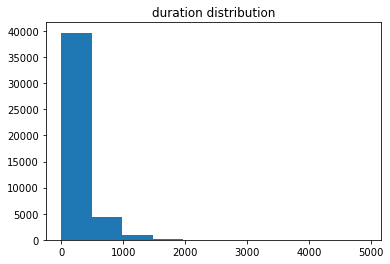

In [41]:
plt.hist(df['duration'])
plt.title('duration distribution')

In [ ]:
#The plot suggest that most of the call ends very quickly
#only a very few cases the cal duration is long

Text(0.5, 1.0, 'balance')

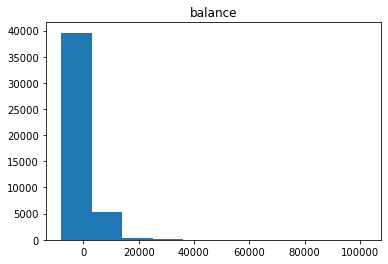

In [42]:
plt.hist(df['balance'])
plt.title('balance')

In [ ]:
#Most of the customers have low balance.

Text(0.5, 1.0, 'loan distribution')

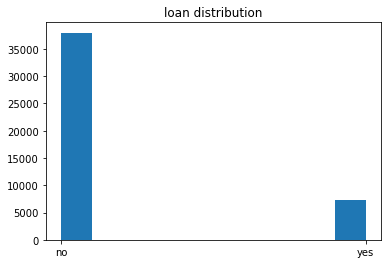

In [43]:
plt.hist(df['loan'])
plt.title('loan distribution')

In [ ]:
#Most of the customers do not have personal loan

Text(0.5, 1.0, 'customer subscribed the term deposit distribution')

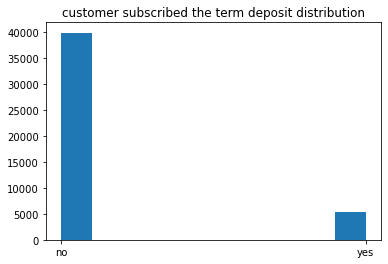

In [44]:
plt.hist(df['y'])
plt.title('customer subscribed the term deposit distribution')

In [ ]:
#Maximum percentage of customers have not subscribed the term deposit 

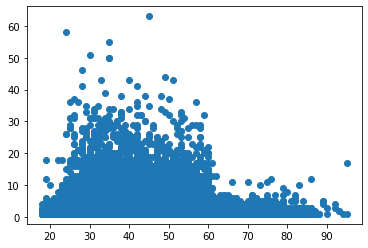

In [45]:
x = df['age']
y = df['campaign']
plt.scatter(x,y)

In [ ]:
#The number of contacts performed during the campaign is more for group 30-60

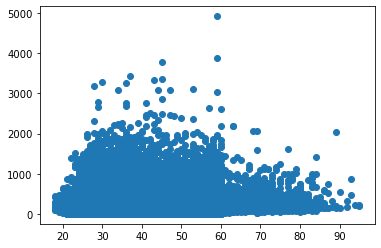

In [46]:
x = df['age']
y = df['duration']
plt.scatter(x,y)

In [ ]:
# call duration is more for customer of age between 30-60

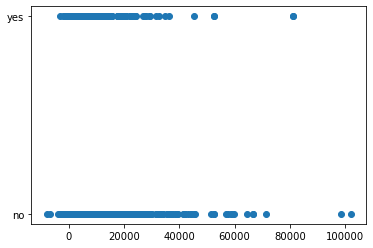

In [47]:
x = df['balance']
y = df['y']
plt.scatter(x,y)

In [ ]:
#Most of the customers with more bank balance hve not subscribed the term deposit  

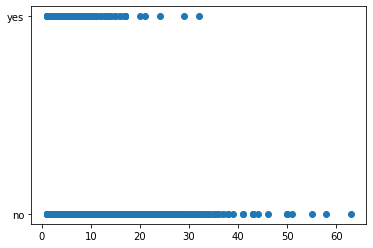

In [48]:
x = df['campaign']
y = df['y']
plt.scatter(x,y)

In [ ]:
# Maximum of the Customers with less number of contacts during the campaign have subscribed the term deposit

Step1:Checking for missing value

In [49]:
#check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#We do not have any missing values in any of the columns of dataset 

In [50]:
#to get the total count of nan values we use sum().sum()
df.isnull().sum().sum()

0

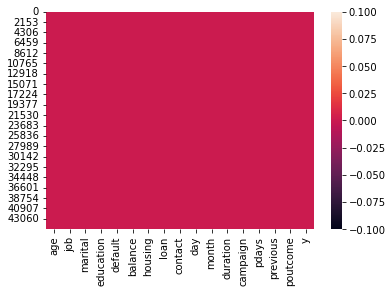

In [51]:
#to visualize the null values
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#The above heatmap shows that there are no nan values in the dataset

Step 2:Check Datatypes

In [52]:
#check datatypes
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Step3 : check for duplicate records

In [53]:
#Check duplicates
df.duplicated().sum()

0

In [ ]:
#There are no duplicated values in the dataset

In [8]:
#Split the dataset into two parts 
#Numeric and categorical
df_num = df.select_dtypes('int64','float64')
df_cat = df.select_dtypes(object)


In [59]:
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [60]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [9]:
#convert the categorical type data into numerical type data using LabelEncoding
from sklearn.preprocessing import LabelEncoder


In [10]:
for col in df_cat:
    #create an object of labelencoder
    le = LabelEncoder()
    # Using .fit_transform() function to fit label
    # encoder and return encoded label
    df_cat[col] = le.fit_transform(df_cat[col]) 

In [11]:
df_cat.dtypes

job          int32
marital      int32
education    int32
default      int32
housing      int32
loan         int32
contact      int32
month        int32
poutcome     int32
y            int32
dtype: object

In [12]:
# After applying LabelEncoder we concatenate df_cat and df_num.
df_new = pd.concat([df_num,df_cat],axis=1)
df_new

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0


In [13]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [14]:
# Split dataset in input and output
#Split the dataset into dependent and independent variables
X=df_new.drop('y',axis=1)
Y=df_new['y']

In [83]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3


In [86]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [15]:
#TrainTestSplitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state =1)


In [16]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler


In [45]:
#create an object of StandardScaler class
ss=StandardScaler()
#apply standard scaler for X_train and X_test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_train

array([[-0.84143541, -0.51390555,  1.34758125, ...,  1.52140573,
         0.82078152,  0.44354185],
       [-0.65299489, -0.59018462,  1.34758125, ...,  1.52140573,
         0.15474035,  0.44354185],
       [-0.84143541, -0.3537195 ,  0.3854076 , ..., -0.71081695,
        -1.51036258,  0.44354185],
       ...,
       [ 0.66608873,  0.89376114,  0.62595101, ...,  1.52140573,
         0.82078152,  0.44354185],
       [ 0.38342795,  0.1284278 ,  0.50567931, ...,  1.52140573,
         0.15474035,  0.44354185],
       [ 0.38342795, -0.32733965,  0.14486419, ..., -0.71081695,
        -1.84338317, -1.58152759]])

In [21]:

from sklearn.linear_model import LogisticRegression 
# Create an object of LogisticRegression class
lr = LogisticRegression()
# To train the model with 70% data use inbuilt method fit()
lr.fit(X_train,Y_train)

LogisticRegression()

In [26]:
# Test the model with 30% data use inbuilt method predict().
Y_pred = lr.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# Create a Dictionary
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
df1=pd.DataFrame(dict)
df1.head(26)


,Actual Output,Predicted Output
3610,0,0
11677,0,0
33018,0,0
44323,1,0
8119,0,0
38958,0,0
18496,0,0
4249,0,0
2214,0,0
28848,0,0


In [38]:
# Check accuracy of model use inbuilt method score() of LogisticRegression.
lr.score(X_test,Y_test)      # Score always varies between 0-1


0.8910350928929519

In [39]:
# Generation Classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 


In [46]:
#validation 
confusion_matrix(Y_test,Y_pred)


array([[11766,   247],
       [ 1231,   320]], dtype=int64)

In [49]:
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.30      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



In [ ]:
#Accuracy of the model is 89%

In [50]:
#The model is not accurate since the value of 0 is 98%

In [ ]:
#There is class imbalance in this dataset